<a href="https://colab.research.google.com/github/graviteja28/Bank_problem/blob/master/My_Bank_Loan_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign for Banking Products
## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Source of Dataset: 
The dataset for this project is retrieved from kaggle

## Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).

## Context:
The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


> ### Import Libraries and set required parameters



In [278]:
import pandas as pd
import numpy as np
import seaborn as sns             #data visualisation
import matplotlib.pyplot as plt   #data visualisation
%matplotlib inline

> ## Data Sourcing






In [279]:
#reading the data from the csv file to the notebook
Bank_Data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [280]:
#print first 5 rows of the data
Bank_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [281]:
#print last 5 rows of the data
Bank_Data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Attribute Information:
 
*   ID                 : Customer ID
*   Age                : Customer's age in completed years

*   Experience         : years of professional experience

*   Income             : Annual income of the customer ($000)

*   ZIP Code: Home Address ZIP code.

*   Family             : Family size of the customer
*   CCAvg: Avg. spending on credit cards per month ($000)


*   Education          : Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional


*   Mortgage           : Value of house mortgage if any. ($000)


*   Personal Loan      : Did this customer accept the personal loan offered in the last
campaign?

*   Securities Account : Does the customer have a securities account with the bank?

*   CD Account         : Does the customer have a certificate of deposit (CD) account with
the bank?

*   Online             : Does the customer use internet banking facilities?


*   Credit card        : Does the customer use a credit card issued by the bank?





In [282]:
#conplete information about the given data
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [283]:
#describe gives us information about count, mean, std, min, max values for the each column in the dataset 
Bank_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [284]:
#check fro the number of null values in each column of the dataset
Bank_Data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

From all the above analysis We now get to know that:


*   Our data has 5000 row and 14 attributes.
*   no null values present in the data. so we can say that our data is clean


*   All the elements is the data are in numeric.



> ## Data Cleaning and Manipulation



In [285]:
#Remove columns where number of unique value is only 1.
unique = Bank_Data.nunique()
unique = unique[unique.values == 1]
Bank_Data.shape

(5000, 14)

In [286]:
#checking correlation in the data
Bank_Data_correlation=Bank_Data.corr()
Bank_Data_correlation

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802




> ## **Data cleaning**





*   Here there is no necessity of the ID column to we can drop ID column.
*   Also the correlation between Age and Experience is nearly to 1 and also the minimum value in the experience coulmn is -3.

*   we can say the Experience will not be in negative.
*   so we can drop Experience column also.


In [287]:
# Remove irrelevant columns.
Bank_Data = Bank_Data.drop(['ID','Experience'],axis=1)
Bank_Data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [288]:
#change the column names for our better understanding
Bank_Data = Bank_Data.rename(columns={'ZIP Code':'ZIP_Code','Personal Loan':'Personal_Loan','CD Account':'CD_Account'})
Bank_Data.head()

,Age,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD_Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


## **Exploratory Data Analysis**

Age                    45
Income                162
ZIP_Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64


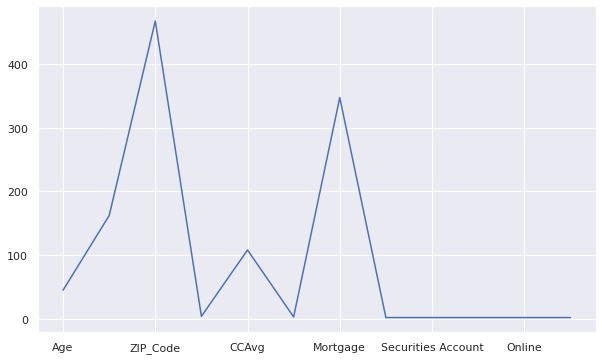

In [289]:
a=Bank_Data.nunique()
plt.figure(figsize = (10,6))
print(a)
a.plot()

From this we get to know that there categorical values like Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard.

In [290]:
#Value counts of all columns.
categorical_valued_columns=['Family', 'Education', 'Personal_Loan', 'Securities Account', 'CD_Account', 'Online', 'CreditCard']
for i in categorical_valued_columns:
    print(Bank_Data[i].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [291]:
#Zip code has 467 distinct values . it is a  nominal variable which has too many levels. so it is better to drop zip code also
Bank_Data=Bank_Data.drop('ZIP_Code',axis=1)

In [292]:
#number of values in Mortage is equal to 0
(Bank_Data.Mortgage==0).sum()

3462

In [293]:
#number of values in CCAvg is equal to 0
(Bank_Data.CCAvg==0).sum()

106

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


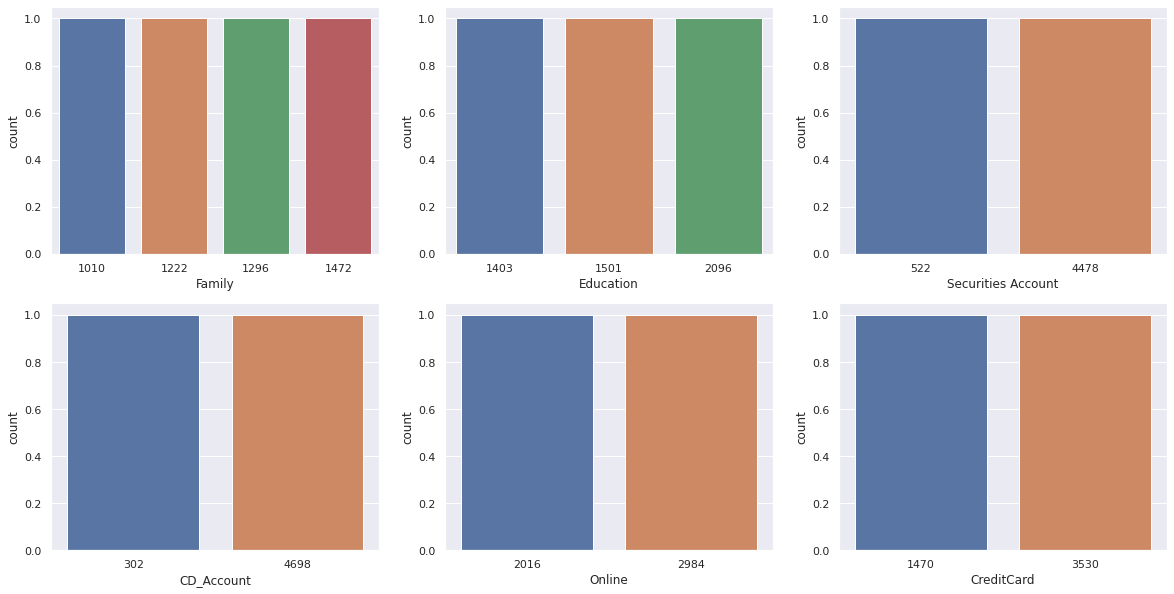

In [294]:
#value count for all categorial columns
l=['Family','Education','Securities Account','CD_Account','Online','CreditCard']
x,y,s=2,3,-1
fig, ax=plt.subplots(nrows =x,ncols=y,figsize=(20,10))
for i in range(x):
    for j in range(y):
        s+=1
        a=Bank_Data[l[s]].value_counts()
        print(a)
        sns.countplot(a,ax=ax[i][j])

0    4520
1     480
Name: Personal_Loan, dtype: int64


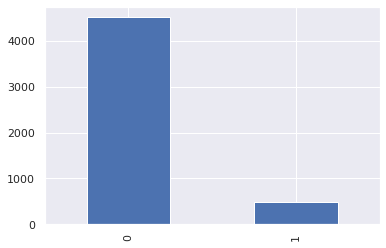

In [295]:
Bank_Data['Personal_Loan'].value_counts().plot(kind = 'bar')
print(Bank_Data['Personal_Loan'].value_counts())

In [296]:
print("Percent of people taken Loan :"+str((480/5000)*100)+"%")

Percent of people taken Loan :9.6%




*   We can conclude about family size of the customers from here. Most of then 
customers are single.

*   It seems 2096 of the customers are undergraduate. After this, professionals(1501) are more than graduate(1403).
*   It seems very few people have taken pesonal loan previous year. Only 480 people from 5000 has acquired the loan. That is only 9.6% of total customers took the loan.


*   This is the percentage which we are trying to increase.

*   Lets check how many customers are having certificate of deposit account with the bank.

*   It also seems pretty low. Only 302 people from 5000 peope have this account. it is only 6.04% of the total customers.

*   Lets check how many customers are having security accounts in the bank.
Only 522 people are having Security account in the bank. That is only 10.4% of total customers are having this account.
*   It seems many people are using online facilities provided by bank but only few are using credit cards. Around 59% people are using online facilities provided by the bank and 29% peole are using the credit card facilties.










> ## Univariate Analysis




*   The distribution plot is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis.
*   A box plot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.


*   A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

*   A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.






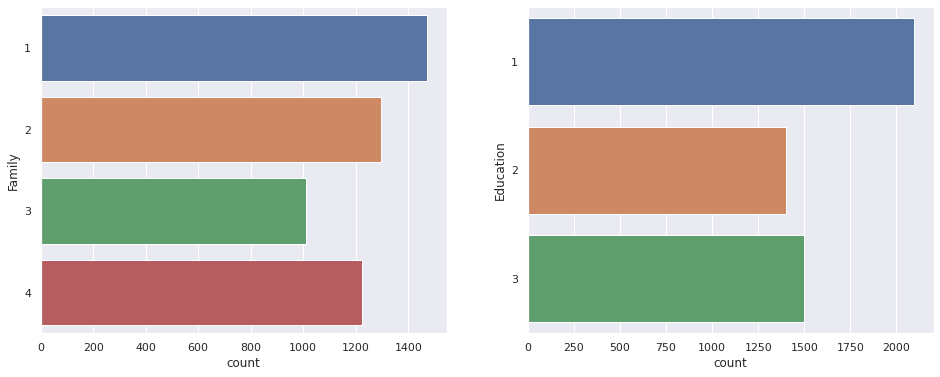

In [297]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(16,6))
sns.countplot(y=Bank_Data['Family'],ax=ax[0])
sns.countplot(y=Bank_Data['Education'],ax=ax[1])

In [298]:
#fuction for printing 3 plots for categorical data
def univariate(df,col,hue =None):   
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    for Continuos   : Distribution, Violin & Boxplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    '''
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(24,6))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[col],ax=ax[0])
    ax[1].set_title("Violin Plot")
    sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
    ax[2].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=ax[2],orient='v')        
    plt.show()

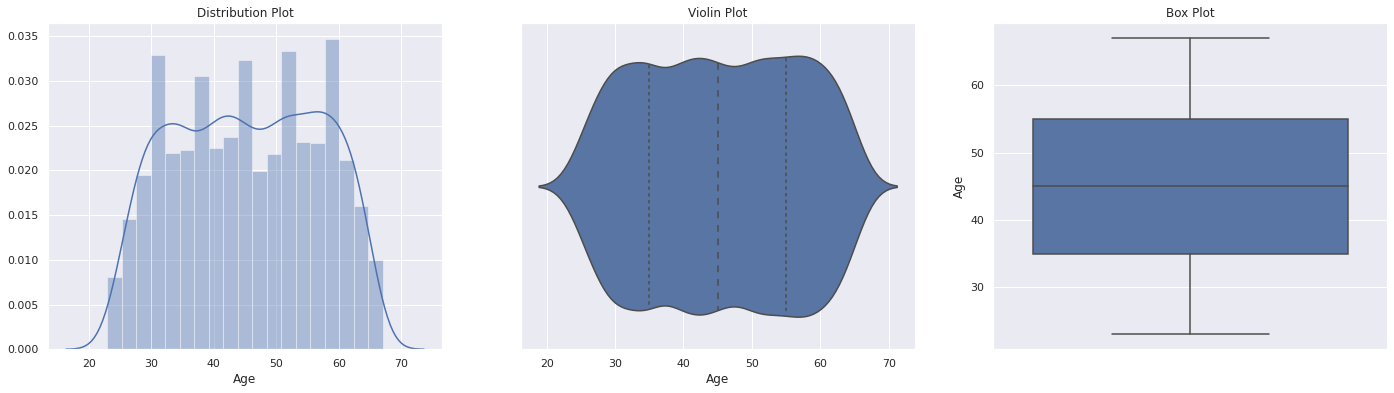

In [299]:
#univarite analysis of Age column
univariate(df=Bank_Data,col='Age')

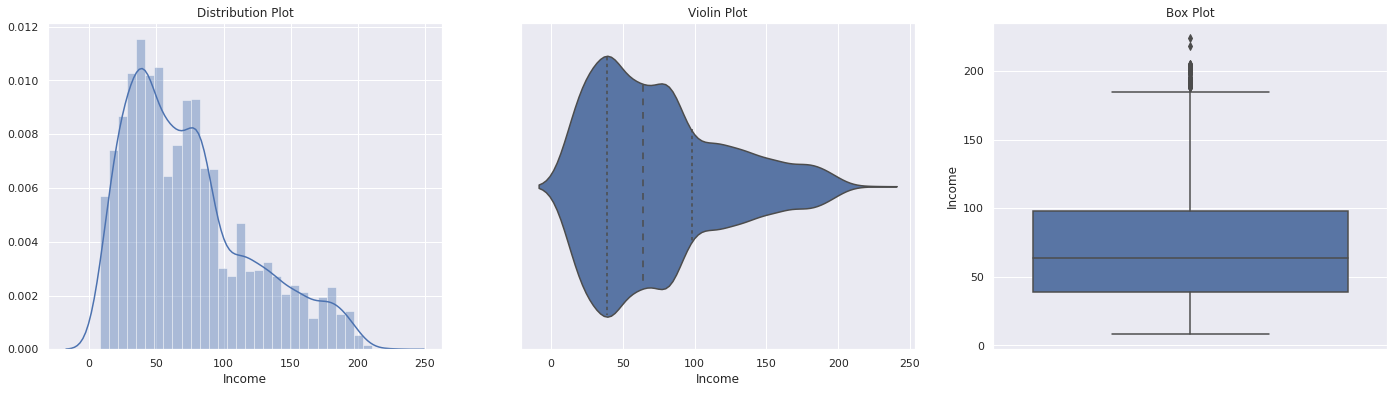

In [300]:
#univarite analysis of Income column
univariate(df=Bank_Data,col='Income')

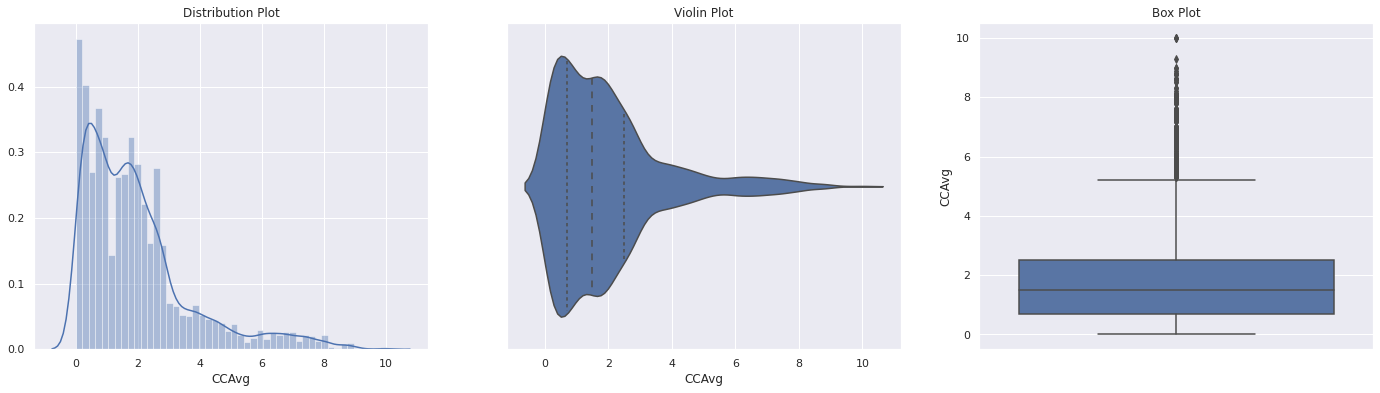

In [301]:
#univarite analysis of CCAvg column
univariate(df=Bank_Data,col='CCAvg')


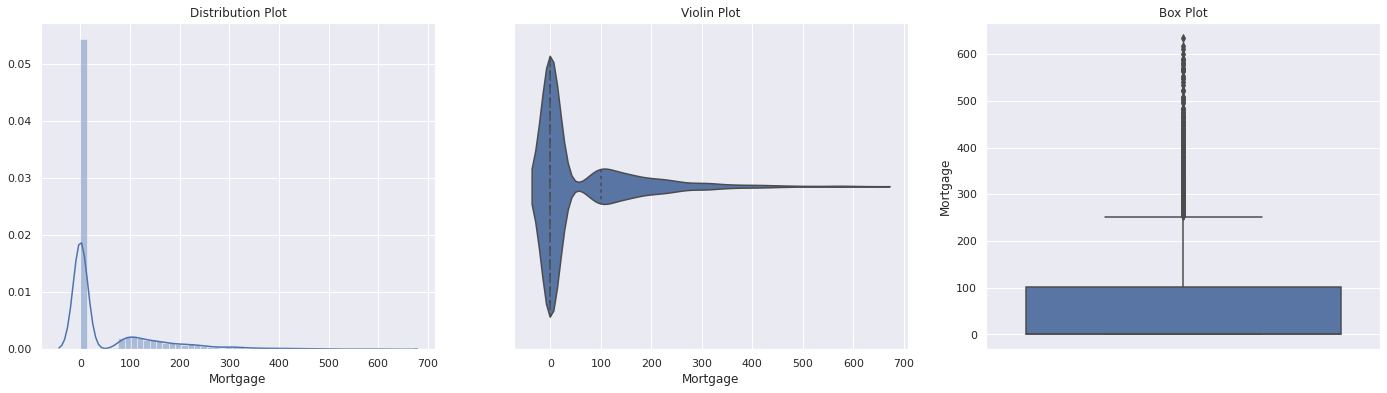

In [302]:
#univarite analysis of Mortage column
univariate(df=Bank_Data,col='Mortgage')


We can see that CCavg and income are not narmalized so we have to normalize these variables first before using them in our model.



> ## Multivariant Analaysis



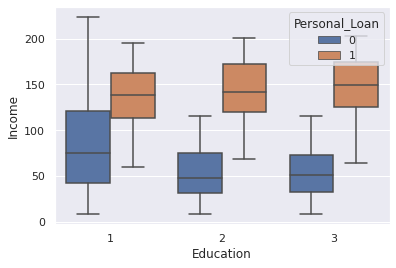

In [303]:
#Multivariant Analaysis of Education, Income and Personal Loan
sns.boxplot(data=Bank_Data,x='Education',y='Income',hue='Personal_Loan')

In [304]:
pd.crosstab(Bank_Data['Securities Account'],Bank_Data['Personal_Loan'])

Personal_Loan,0,1
Securities Account,,
0,4058,420
1,462,60


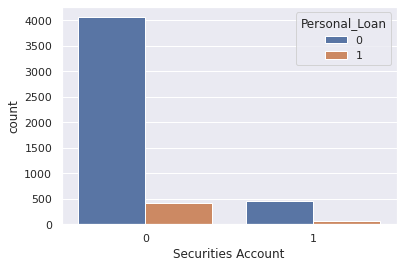

In [305]:
#Multivariant Analaysis of Securities Account and Personal Loan
sns.countplot(data=Bank_Data,x="Securities Account",hue="Personal_Loan")

In [306]:
pd.crosstab(Bank_Data['Education'],Bank_Data['Personal_Loan'])

Personal_Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


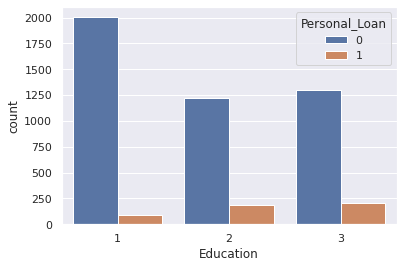

In [307]:
#Multivariant Analaysis of Education and Personal Loan
sns.countplot(data=Bank_Data,x="Education",hue="Personal_Loan")

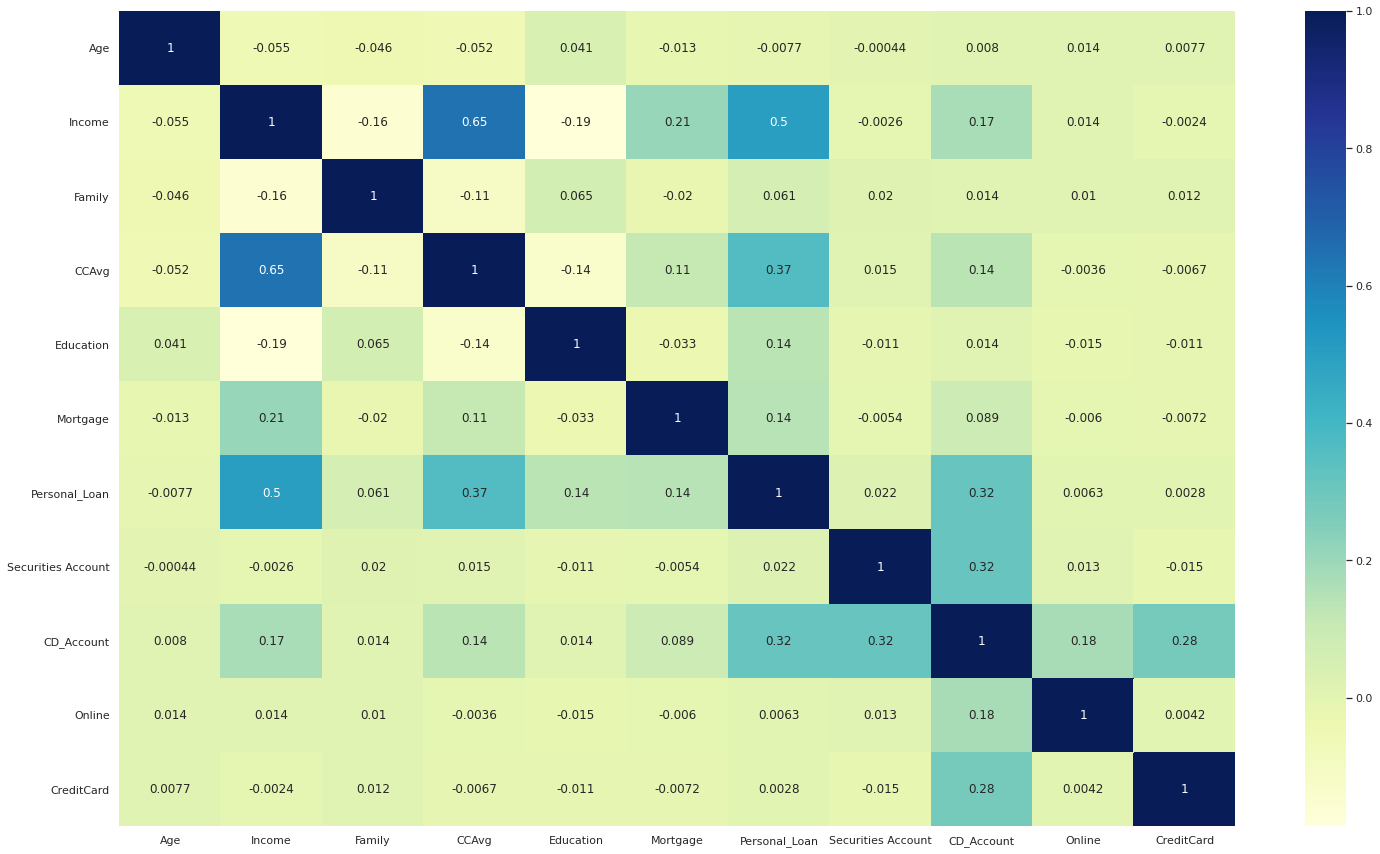

In [308]:
#Heatmap for clear Visualisation of correlation between different columns of the data
fig, ax=plt.subplots(figsize=(25,15))
sns.heatmap(Bank_Data.corr(),annot=True,cmap='YlGnBu')

In [309]:
Bank_Data.shape

(5000, 11)

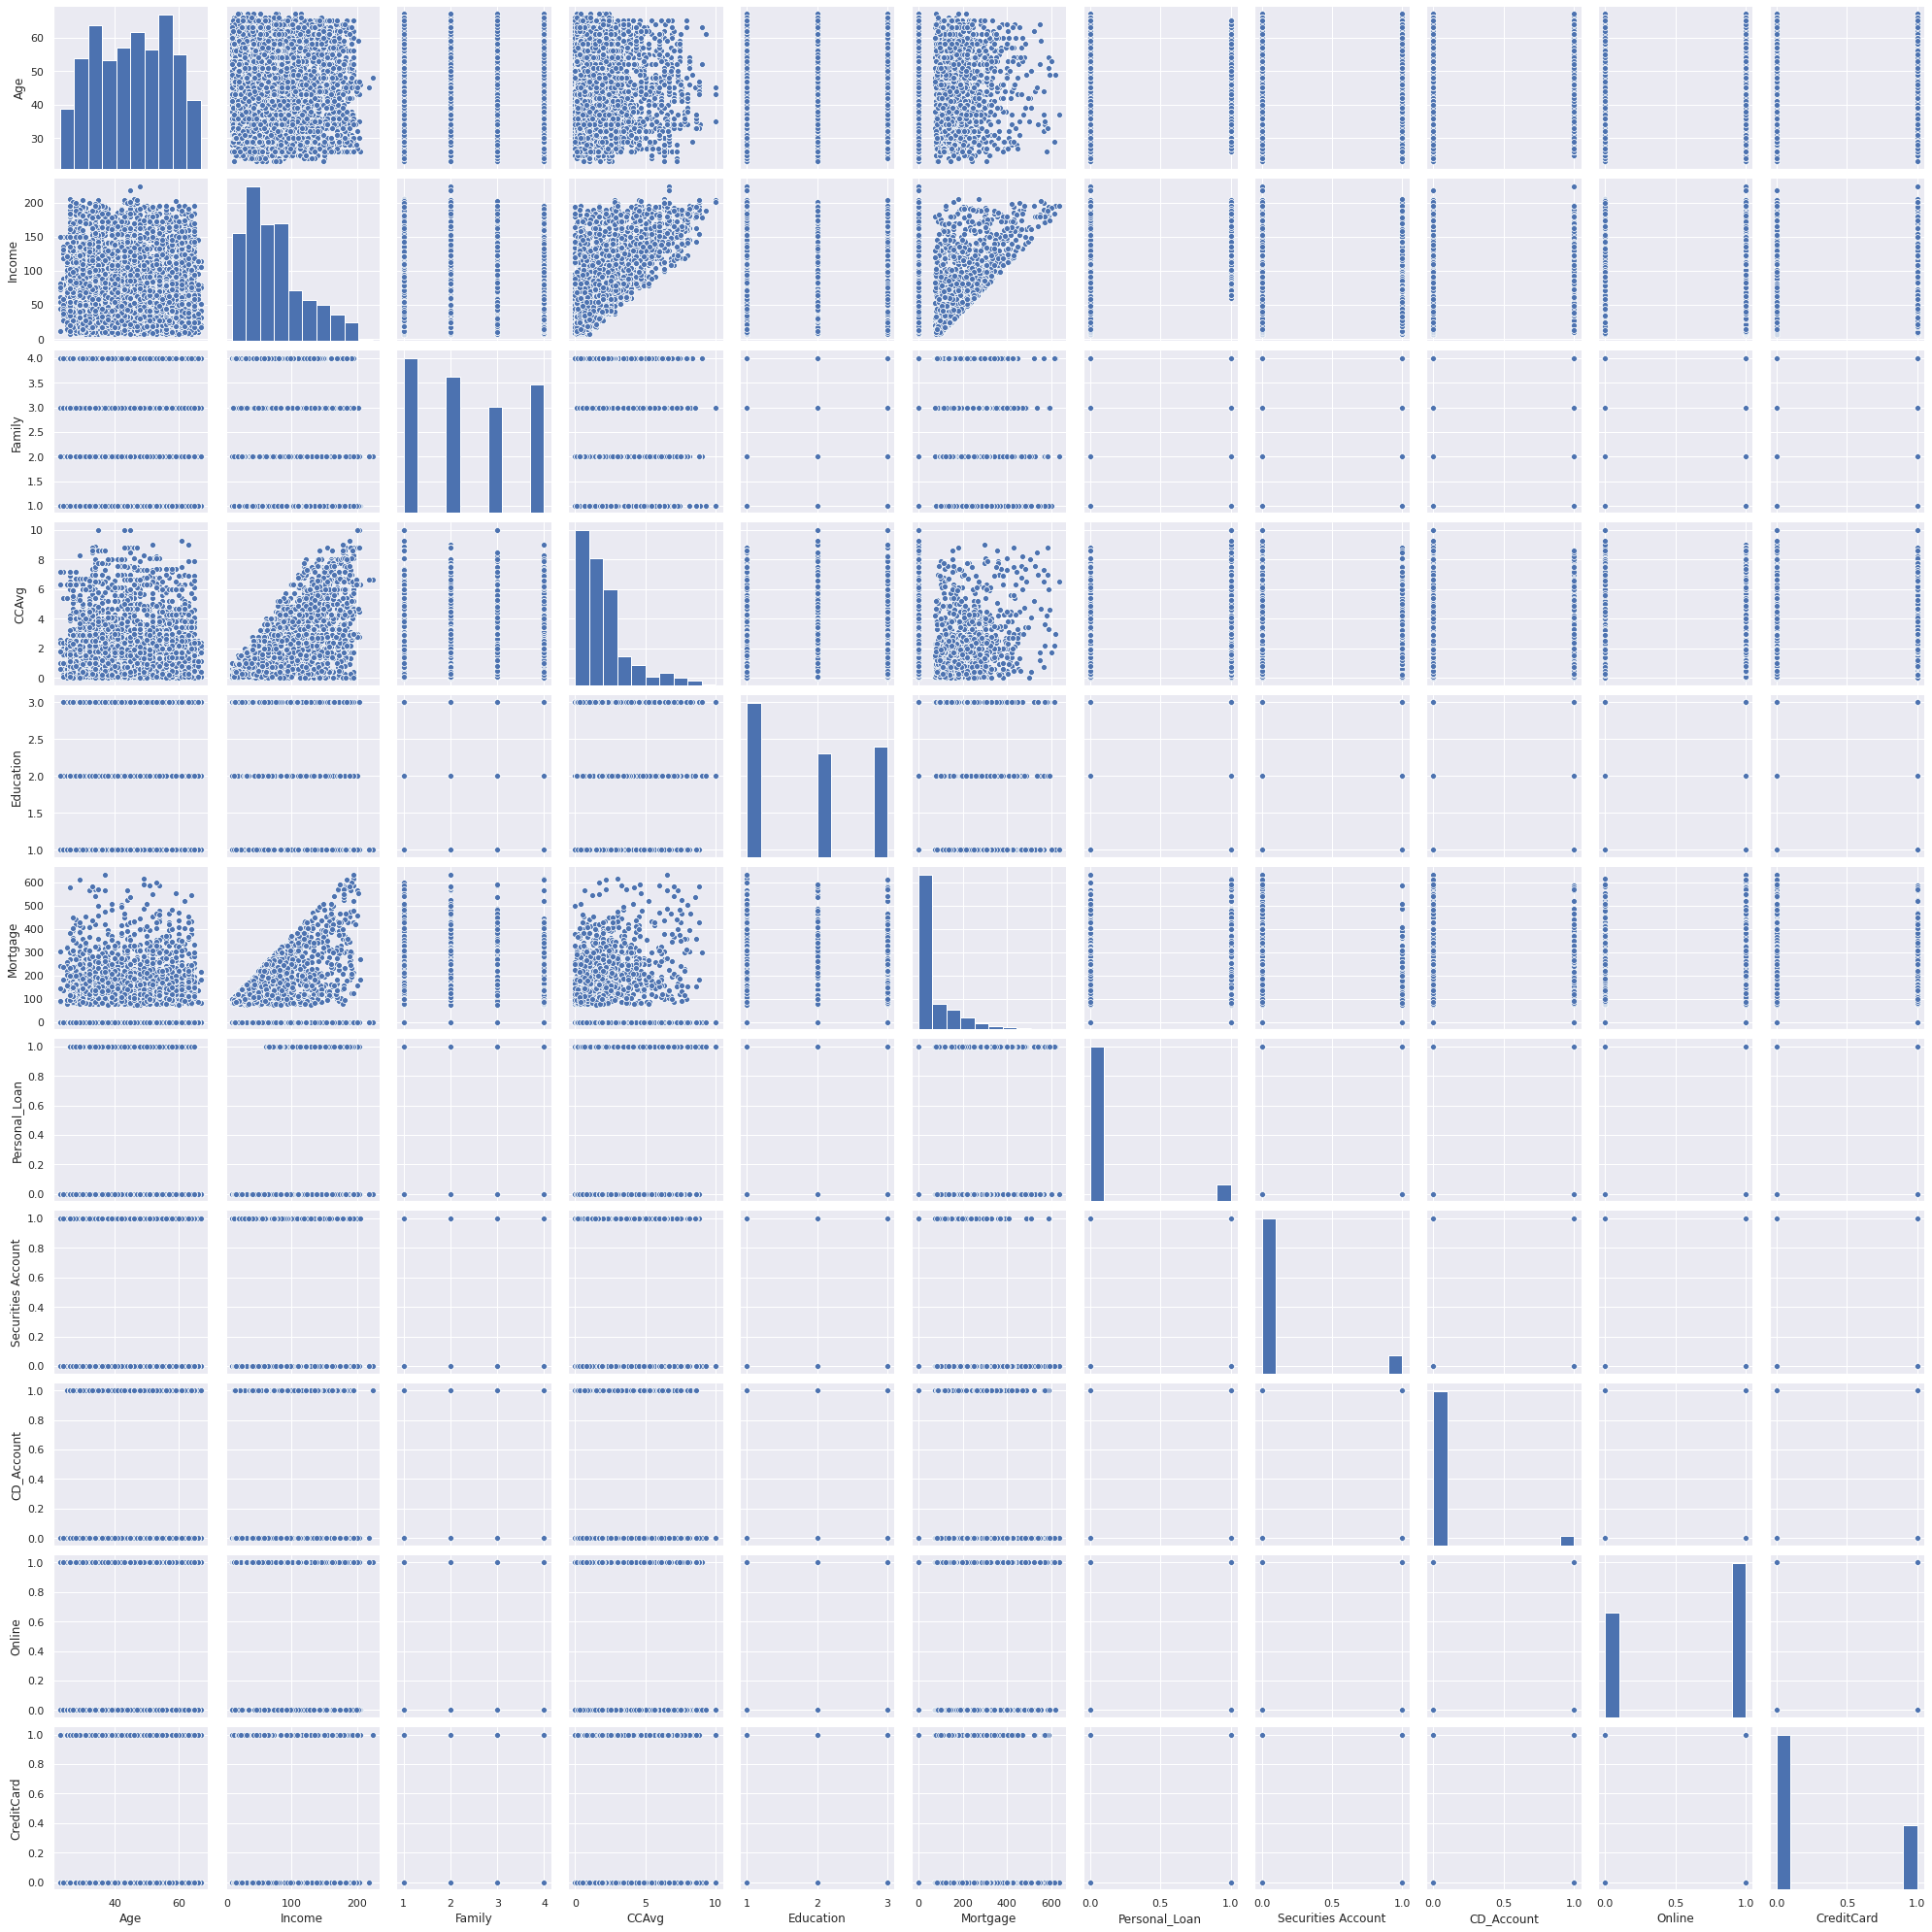

In [310]:
#pairplot between different columns of the data
sns.pairplot(Bank_Data)

In [311]:
#data_x consist coulmns without personal Loan where as data_y consists only personal Loan data
Bank_Data_x=Bank_Data.loc[:,Bank_Data.columns!='Personal_Loan']
Bank_Data_y=Bank_Data['Personal_Loan']

## Feature Scaling and Trasformations

In [312]:
from sklearn.preprocessing import PowerTransformer

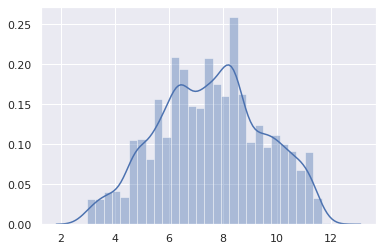

In [313]:
#powertrasformation of Income column
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(Bank_Data_x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(Bank_Data_x['Income'].values.reshape(-1,1)))

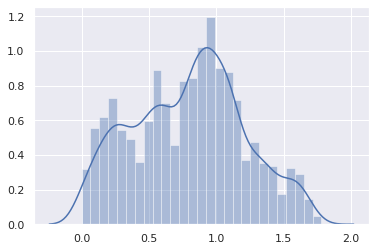

In [314]:
#powertrasformation of CCAvg column
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(Bank_Data_x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(Bank_Data_x['CCAvg'].values.reshape(-1,1)))


Now, ccavg and income are transformed. But now we have to transform the mortgage column. We have found that many values are 0 and other are only few.

In [315]:
#Lable encoding
Bank_Data_x['Mortgage_int']=pd.cut(Bank_Data_x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
Bank_Data_x.drop('Mortgage',axis=1,inplace=True)

## Spliting the data into training and test set 

Normalise the data and split the data into training and test set in the ratio of 70:30

In [316]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Bank_Data_x,Bank_Data_y,test_size=0.2,stratify=Bank_Data_y,random_state=0)

In [317]:
print('Shape of X_train is: ',x_train.shape)
print('Shape of X_test is: ',x_test.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (4000, 10)
Shape of X_test is:  (1000, 10)
Shape of Y_train is:  (4000,)
Shape of y_test is:  (1000,)


## Logistic Regression

In [318]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [319]:
log.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [320]:
log.score(x_train,y_train)

0.9485

In [321]:
#Predicting test and train dataset
pred1=log.predict(x_test)
pred2=log.predict(x_train)

In [322]:
#importing libraries for classification performance metrics
from sklearn import metrics
from sklearn.metrics import classification_report

### **Performance of the Model**

In [323]:
print("Performance for test data")
print("Mean Absolute Error for Test data:",metrics.mean_absolute_error(y_test,pred1))
print("R2 score for test data:",metrics.r2_score(y_test,pred1))
print("Accuracy score for test data",metrics.accuracy_score(y_test,pred1))
print("----------------------------------------------------------------------")
print("Performance for train data")
print("Mean Absolute Error for Train data:",metrics.mean_absolute_error(y_train,pred2))
print("R2 score for train data:",metrics.r2_score(y_train,pred2))
print("Accuracy score for train data",metrics.accuracy_score(y_train,pred2))

Performance for test data
Mean Absolute Error for Test data: 0.052
R2 score for test data: 0.40081120943952797
Accuracy score for test data 0.948
----------------------------------------------------------------------
Performance for train data
Mean Absolute Error for Train data: 0.0515
R2 score for train data: 0.4065726401179941
Accuracy score for train data 0.9485


Classification Report for both test and train data

In [324]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.82      0.58      0.68        96

    accuracy                           0.95      1000
   macro avg       0.89      0.79      0.83      1000
weighted avg       0.94      0.95      0.94      1000



In [325]:
print(classification_report(y_train,pred2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3616
           1       0.82      0.59      0.69       384

    accuracy                           0.95      4000
   macro avg       0.89      0.79      0.83      4000
weighted avg       0.94      0.95      0.94      4000



In [326]:
#test Confusion matrix
metrics.confusion_matrix(y_test,pred1)

array([[892,  12],
       [ 40,  56]])

In [327]:
#train Confusion matrix
metrics.confusion_matrix(y_train,pred2)

array([[3566,   50],
       [ 156,  228]])

In [328]:
data={'y_test':y_test,'pred':pred1}
pd.DataFrame(data=data)

,y_test,pred
117,0,0
1816,0,0
670,0,0
2993,0,0
3264,0,0
...,...,...
4330,0,0
3220,0,0
1931,0,0
4959,0,0


## Desicion Tree

In [329]:
from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier()

In [330]:
dtclf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

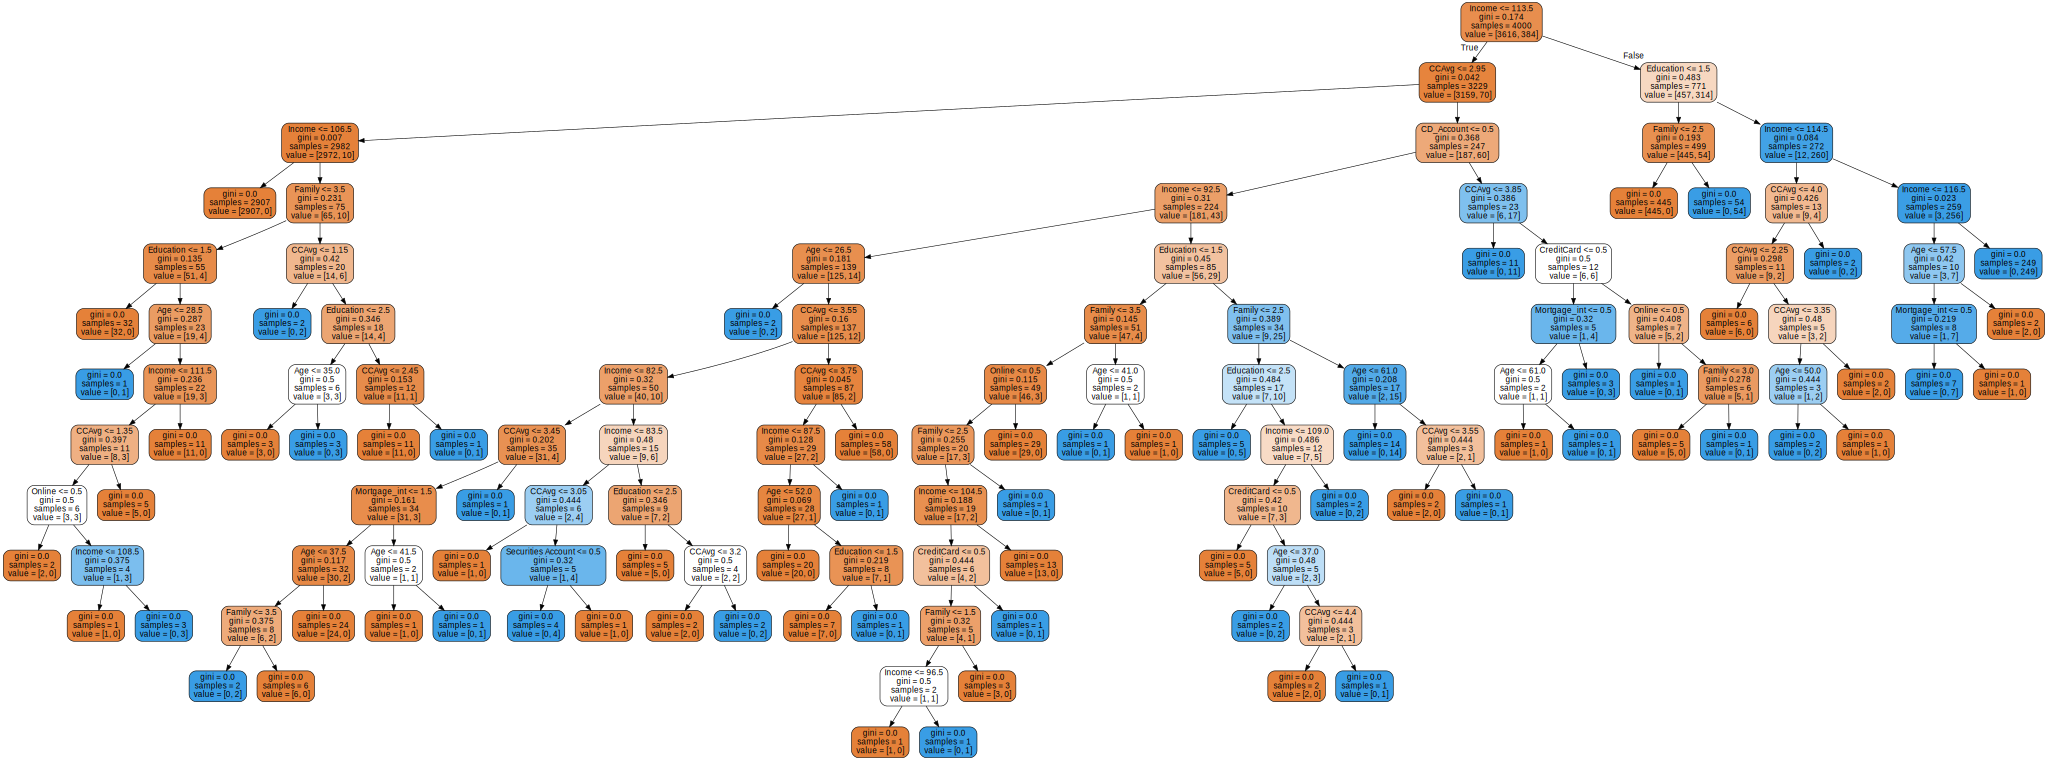

In [331]:
import graphviz
from sklearn import tree
l=list(Bank_Data_x.columns)
dot_data = tree.export_graphviz(dtclf, out_file=None,feature_names=l,filled=True, rounded=True) 
graphviz.Source(dot_data)

In [332]:
dtclf.score(x_train,y_train)

1.0

In [333]:
#Predicting test and train dataset
pred1=dtclf.predict(x_test)
pred2=dtclf.predict(x_train)

### **Performance of the Model**

In [334]:
print("Performance for test data")
print("Mean Absolute Error for Test data:",metrics.mean_absolute_error(y_test,pred1))
print("R2 score for test data:",metrics.r2_score(y_test,pred1))
print("Accuracy score for test data",metrics.accuracy_score(y_test,pred1))
print("----------------------------------------------------------------------")
print("Performance for train data")
print("Mean Absolute Error for Train data:",metrics.mean_absolute_error(y_train,pred2))
print("R2 score for train data:",metrics.r2_score(y_train,pred2))
print("Accuracy score for train data",metrics.accuracy_score(y_train,pred2))

Performance for test data
Mean Absolute Error for Test data: 0.013
R2 score for test data: 0.850202802359882
Accuracy score for test data 0.987
----------------------------------------------------------------------
Performance for train data
Mean Absolute Error for Train data: 0.0
R2 score for train data: 1.0
Accuracy score for train data 1.0


Classification Report for both test and train data

In [335]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.96      0.91      0.93        96

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [336]:
print(classification_report(y_train,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [337]:
#test Confusion matrix
metrics.confusion_matrix(y_test,pred1)

array([[900,   4],
       [  9,  87]])

In [338]:
#train Confusion matrix
metrics.confusion_matrix(y_train,pred2)

array([[3616,    0],
       [   0,  384]])

In [339]:
data={'y_test':y_test,'pred':pred1}
pd.DataFrame(data=data)

,y_test,pred
117,0,0
1816,0,0
670,0,0
2993,0,0
3264,0,0
...,...,...
4330,0,0
3220,0,0
1931,0,0
4959,0,0


## Random Forest Classifier

In [340]:
from sklearn.ensemble import RandomForestClassifier
f11=RandomForestClassifier()

In [341]:
f11.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [342]:
#Predicting test and train dataset
pred1=f11.predict(x_test)
pred2=f11.predict(x_train)



> ## Predicting test and train dataset



In [343]:
print("Performance for test data")
print("Mean Absolute Error for Test data:",metrics.mean_absolute_error(y_test,pred1))
print("R2 score for test data:",metrics.r2_score(y_test,pred1))
print("Accuracy score for test data",metrics.accuracy_score(y_test,pred1))
print("----------------------------------------------------------------------")
print("Performance for train data")
print("Mean Absolute Error for Train data:",metrics.mean_absolute_error(y_train,pred2))
print("R2 score for train data:",metrics.r2_score(y_train,pred2))
print("Accuracy score for train data",metrics.accuracy_score(y_train,pred2))

Performance for test data
Mean Absolute Error for Test data: 0.012
R2 score for test data: 0.8617256637168141
Accuracy score for test data 0.988
----------------------------------------------------------------------
Performance for train data
Mean Absolute Error for Train data: 0.0
R2 score for train data: 1.0
Accuracy score for train data 1.0


Classification Report for both test and train data

In [344]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.96      0.92      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [345]:
print(classification_report(y_train,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [346]:
#test Confusion matrix
metrics.confusion_matrix(y_test,pred1)

array([[900,   4],
       [  8,  88]])

In [347]:
#train Confusion matrix
metrics.confusion_matrix(y_train,pred2)

array([[3616,    0],
       [   0,  384]])

In [348]:
data={'y_test':y_test,'pred':pred1}
pd.DataFrame(data=data)

,y_test,pred
117,0,0
1816,0,0
670,0,0
2993,0,0
3264,0,0
...,...,...
4330,0,0
3220,0,0
1931,0,0
4959,0,0




> # Naive Bayes



In [349]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [350]:
#Predicting test and train dataset
pred1=log.predict(x_test)
pred2=log.predict(x_train)

### **Performance of the Model**

In [351]:
print("Performance for test data")
print("Mean Absolute Error for Test data:",metrics.mean_absolute_error(y_test,pred1))
print("R2 score for test data:",metrics.r2_score(y_test,pred1))
print("Accuracy score for test data",metrics.accuracy_score(y_test,pred1))
print("----------------------------------------------------------------------")
print("Performance for train data")
print("Mean Absolute Error for Train data:",metrics.mean_absolute_error(y_train,pred2))
print("R2 score for train data:",metrics.r2_score(y_train,pred2))
print("Accuracy score for train data",metrics.accuracy_score(y_train,pred2))

Performance for test data
Mean Absolute Error for Test data: 0.052
R2 score for test data: 0.40081120943952797
Accuracy score for test data 0.948
----------------------------------------------------------------------
Performance for train data
Mean Absolute Error for Train data: 0.0515
R2 score for train data: 0.4065726401179941
Accuracy score for train data 0.9485


Classification Report for both test and train data

In [352]:
classification_report(y_test,pred1)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97       904\n           1       0.82      0.58      0.68        96\n\n    accuracy                           0.95      1000\n   macro avg       0.89      0.79      0.83      1000\nweighted avg       0.94      0.95      0.94      1000\n'

In [353]:
classification_report(y_train,pred2)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97      3616\n           1       0.82      0.59      0.69       384\n\n    accuracy                           0.95      4000\n   macro avg       0.89      0.79      0.83      4000\nweighted avg       0.94      0.95      0.94      4000\n'

In [354]:
#test Confusion matrix
metrics.confusion_matrix(y_test,pred1)

array([[892,  12],
       [ 40,  56]])

In [355]:
#train Confusion matrix
metrics.confusion_matrix(y_train,pred2)

array([[3566,   50],
       [ 156,  228]])

In [356]:
data={'y_test':y_test,'pred':pred1}
pd.DataFrame(data=data)

,y_test,pred
117,0,0
1816,0,0
670,0,0
2993,0,0
3264,0,0
...,...,...
4330,0,0
3220,0,0
1931,0,0
4959,0,0




> # KNN Alogorithm



In [357]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [358]:
#Predicting test and train dataset
pred1=log.predict(x_test)
pred2=log.predict(x_train)

### **Performance of the Model**

In [359]:
print("Performance for test data")
print("Mean Absolute Error for Test data:",metrics.mean_absolute_error(y_test,pred1))
print("R2 score for test data:",metrics.r2_score(y_test,pred1))
print("Accuracy score for test data",metrics.accuracy_score(y_test,pred1))
print("----------------------------------------------------------------------")
print("Performance for train data")
print("Mean Absolute Error for Train data:",metrics.mean_absolute_error(y_train,pred2))
print("R2 score for train data:",metrics.r2_score(y_train,pred2))
print("Accuracy score for train data",metrics.accuracy_score(y_train,pred2))

Performance for test data
Mean Absolute Error for Test data: 0.052
R2 score for test data: 0.40081120943952797
Accuracy score for test data 0.948
----------------------------------------------------------------------
Performance for train data
Mean Absolute Error for Train data: 0.0515
R2 score for train data: 0.4065726401179941
Accuracy score for train data 0.9485


Classification Report for both test and train data

In [360]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.82      0.58      0.68        96

    accuracy                           0.95      1000
   macro avg       0.89      0.79      0.83      1000
weighted avg       0.94      0.95      0.94      1000



In [361]:
print(classification_report(y_train,pred2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3616
           1       0.82      0.59      0.69       384

    accuracy                           0.95      4000
   macro avg       0.89      0.79      0.83      4000
weighted avg       0.94      0.95      0.94      4000



In [362]:
#test Confusion matrix
metrics.confusion_matrix(y_test,pred1)

array([[892,  12],
       [ 40,  56]])

In [363]:
#train Confusion matrix
metrics.confusion_matrix(y_train,pred2)

array([[3566,   50],
       [ 156,  228]])

In [364]:
data={'y_test':y_test,'pred':pred1}
pd.DataFrame(data=data)

,y_test,pred
117,0,0
1816,0,0
670,0,0
2993,0,0
3264,0,0
...,...,...
4330,0,0
3220,0,0
1931,0,0
4959,0,0


# **Conclusion**

In the first step of this project we imported various libraries and our data. Than we found out various things about our data.


* The main objective of the project is to design a better model to predict whether a person will take personal loan or not.

*   afte check the different values from the data scoring & data cleaning and Manipulation We get to know that age and experience are highly correlated so we droped the experience column.

*   And Also the ID were not contributing factors for a person to take loan so we dropped column.

*   For our better understanding we changed the column names

*   for checking value count of differet categorical values, Zip code has 467 distinct values . it is a  nominal variable which has too many levels. so we droped zip code also

*  After Exploratory Data Analysiswe get to know that the Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.


*   Here The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.


After the analysis we used several models for the predictions

Lets see the performance scores for different models

## **Logistic Regression**
### Mean Absolute Error for Test data: 0.052
### R2 score for test data: 0.40081120943952797
### Accuracy score for test data **0.948**

## **Desicion Tree**
### Mean Absolute Error for Test data: 0.012
### R2 score for test data: 0.8617256637168141
### Accuracy score for test data **0.988**

## **Random Forest Classifier**
### Mean Absolute Error for Test data: 0.013
### R2 score for test data: 0.850202802359882
### Accuracy score for test data **0.987**

## **Naive Bayes**
### Mean Absolute Error for Test data: 0.052
### R2 score for test data: 0.40081120943952797
### Accuracy score for test data **0.948**

## **KNN Alogorithm**
### Mean Absolute Error for Test data: 0.052
### R2 score for test data: 0.40081120943952797
### Accuracy score for test data **0.948**


### **By seeing all the performance scores of different models we can conclude that Decision Tree performed better than others**